In [1]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:

from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()
start = '2000-01-01'
end = '2023-01-01'
spy = pdr.get_data_yahoo('SBIN.NS', start, end)

print(spy)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-03   22.267092   22.988886   22.101974   22.988886   16.423580   
2000-01-04   22.988886   24.720245   22.535995   24.446625   17.465008   
2000-01-05   23.493668   24.974997   23.116261   23.441774   16.747124   
2000-01-06   23.776726   25.286358   23.776726   24.625893   17.593079   
2000-01-07   24.673071   26.409147   24.059780   25.786425   18.422182   
...                ...         ...         ...         ...         ...   
2022-12-26  574.000000  601.700012  570.700012  597.099976  597.099976   
2022-12-27  600.400024  603.099976  593.299988  601.900024  601.900024   
2022-12-28  600.900024  607.000000  598.549988  601.049988  601.049988   
2022-12-29  600.000000  618.000000  597.150024  611.799988  611.799988   
2022-12-30  615.250000  620.549988  611.349

In [3]:
spy.head()
# spy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,22.267092,22.988886,22.101974,22.988886,16.423580,25152894
2000-01-04,22.988886,24.720245,22.535995,24.446625,17.465008,47648560
2000-01-05,23.493668,24.974997,23.116261,23.441774,16.747124,36396207
2000-01-06,23.776726,25.286358,23.776726,24.625893,17.593079,70573968
2000-01-07,24.673071,26.409147,24.059780,25.786425,18.422182,83453217


In [4]:
spy = spy.reset_index()
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,22.267092,22.988886,22.101974,22.988886,16.423580,25152894
1,2000-01-04,22.988886,24.720245,22.535995,24.446625,17.465008,47648560
2,2000-01-05,23.493668,24.974997,23.116261,23.441774,16.747124,36396207
3,2000-01-06,23.776726,25.286358,23.776726,24.625893,17.593079,70573968
4,2000-01-07,24.673071,26.409147,24.059780,25.786425,18.422182,83453217


In [5]:
spy = spy.drop(['Date', 'Adj Close'], axis = 1)
spy.head()

,Open,High,Low,Close,Volume
0,22.267092,22.988886,22.101974,22.988886,25152894
1,22.988886,24.720245,22.535995,24.446625,47648560
2,23.493668,24.974997,23.116261,23.441774,36396207
3,23.776726,25.286358,23.776726,24.625893,70573968
4,24.673071,26.409147,24.059780,25.786425,83453217


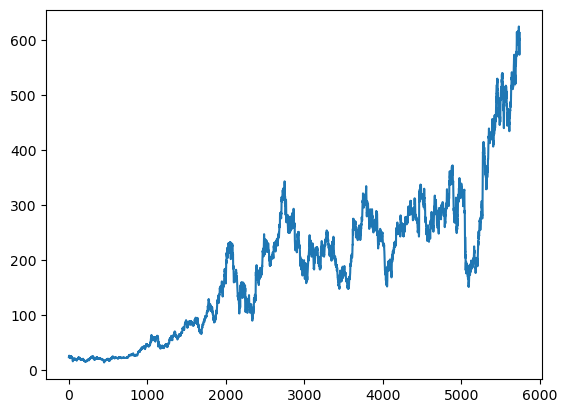

In [6]:
plt.plot(spy.Close)

In [7]:
ma100= spy.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5741    565.3870
5742    566.0685
5743    566.6580
5744    567.3675
5745    568.1720
Name: Close, Length: 5746, dtype: float64

In [8]:
ma200 = spy.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5741    523.65725
5742    524.46525
5743    525.21200
5744    525.92750
5745    526.64425
Name: Close, Length: 5746, dtype: float64

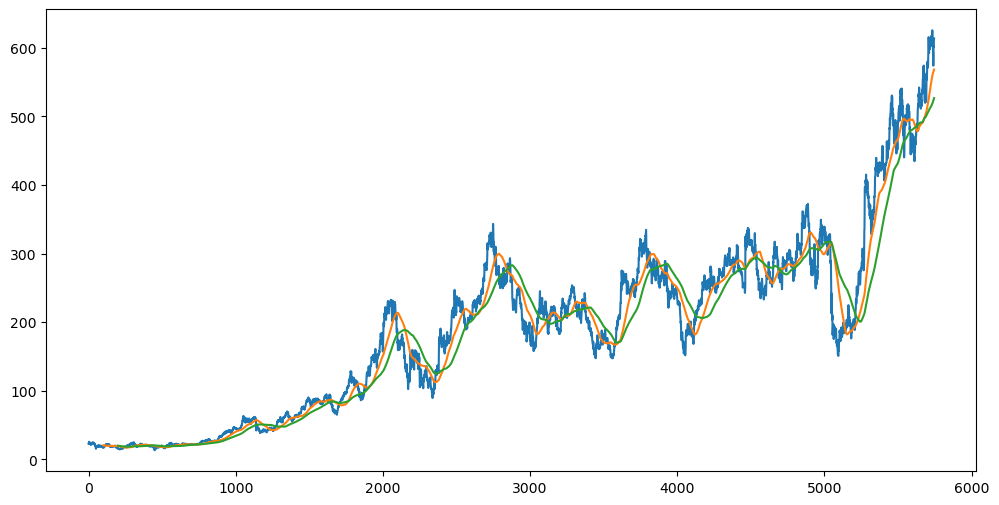

In [9]:
plt.figure(figsize=(12,6))
plt.plot(spy.Close)
plt.plot(ma100)
plt.plot(ma200)

In [10]:
spy.shape

(5746, 5)

In [11]:
# spliting the data into training and testing
data_training = pd.DataFrame(spy['Close'][0:int(len(spy)*0.7)])
data_testing = pd.DataFrame(spy['Close'][int(len(spy)*.7):int(len(spy))])

print(data_training.shape)
print(data_testing.shape)


(4022, 1)
(1724, 1)


In [12]:
data_training.head()

,Close
0,22.988886
1,24.446625
2,23.441774
3,24.625893
4,25.786425


In [13]:
data_testing.head()

,Close
4022,204.300003
4023,199.399994
4024,200.899994
4025,196.050003
4026,184.300003


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02922066],
       [0.03363806],
       [0.03059305],
       ...,
       [0.61668055],
       [0.59455926],
       [0.59274105]])

In [16]:
x_train = []
y_train= []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = ny.array(x_train), ny.array(y_train)

In [17]:
#ml model

In [18]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
# Creating models based on instances of the sequential() class
# The model has one input variable, a hidden layer with two neurons, and an output layer with one binary output
model = Sequential()

# for overfitting of problem we are using dropout 0<p<1 which select random pth value and pass to the next layer
# relu = rectified linear unit function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
#  Adaptive Moment Estimation : algorithm used in deep learning that helps adjust the parameters of a neural network in real-time to improve its accuracy and speed. 
# Loss function is used to find error or deviation in the learning process
model.compile(optimizer='adam', loss= 'mean_squared_error')

model.fit(x_train, y_train, epochs=50)

Epoch 1/50
123/123 [==============================] - 23s 160ms/step - loss: 0.0301
Epoch 2/50
123/123 [==============================] - 26s 211ms/step - loss: 0.0073
Epoch 3/50
123/123 [==============================] - 25s 200ms/step - loss: 0.0067
Epoch 4/50
123/123 [==============================] - 24s 191ms/step - loss: 0.0058
Epoch 5/50
123/123 [==============================] - 25s 206ms/step - loss: 0.0054
Epoch 6/50
123/123 [==============================] - 23s 190ms/step - loss: 0.0051
Epoch 7/50
123/123 [==============================] - 22s 179ms/step - loss: 0.0050
Epoch 8/50
123/123 [==============================] - 22s 178ms/step - loss: 0.0044
Epoch 9/50
123/123 [==============================] - 22s 178ms/step - loss: 0.0043
Epoch 10/50
123/123 [==============================] - 22s 178ms/step - loss: 0.0043
Epoch 11/50
123/123 [==============================] - 22s 176ms/step - loss: 0.0039
Epoch 12/50
123/123 [==============================] - 21s 175ms/step - lo

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
4022,204.300003
4023,199.399994
4024,200.899994
4025,196.050003
4026,184.300003


In [26]:
past_100_days = data_training.tail(100)

In [48]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\sreej\AppData\Local\Temp\ipykernel_24608\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [28]:
 print(final_df)

           Close
0     256.350006
1     259.299988
2     268.500000
3     279.750000
4     284.799988
...          ...
1819  597.099976
1820  601.900024
1821  601.049988
1822  611.799988
1823  613.700012

[1824 rows x 1 columns]


In [29]:
print(data_testing)

           Close
4022  204.300003
4023  199.399994
4024  200.899994
4025  196.050003
4026  184.300003
...          ...
5741  597.099976
5742  601.900024
5743  601.049988
5744  611.799988
5745  613.700012

[1724 rows x 1 columns]


In [30]:
final_df.head(10)

,Close
0,256.350006
1,259.299988
2,268.500000
3,279.750000
4,284.799988
5,278.000000
6,270.549988
7,267.500000
8,245.399994
9,253.350006


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.22226904],
       [0.22848411],
       [0.24786684],
       ...,
       [0.94848833],
       [0.9711366 ],
       [0.9751396 ]])

In [32]:
input_data.shape

(1824, 1)

In [33]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [34]:
x_test, y_test = ny.array(x_test), ny.array(y_test)

In [35]:
print(x_test.shape)

(1724, 100, 1)


In [36]:
print(y_test.shape)

(1724,)


In [37]:
# Making Prediction

y_predicted = model.predict(x_test)

54/54 [==============================] - 3s 54ms/step


In [38]:
y_predicted.shape


(1724, 1)

In [39]:
y_test

array([0.11260929, 0.10228587, 0.10544609, ..., 0.94848833, 0.9711366 ,
       0.9751396 ])

In [40]:
y_predicted

array([[0.24494278],
       [0.24201949],
       [0.23847891],
       ...,
       [0.8630698 ],
       [0.8682509 ],
       [0.87535906]], dtype=float32)

In [41]:
scaler.scale_

array([0.00210682])

In [42]:
scale_factor  = 1/0.01786672
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

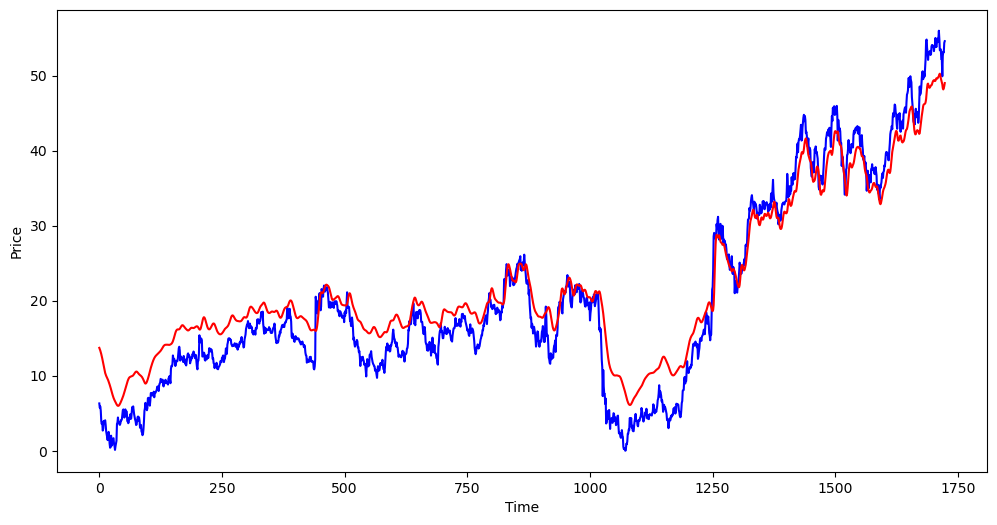

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()